In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [4]:
df.shape

(2713, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


# Exploratory Data Aanalysis

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

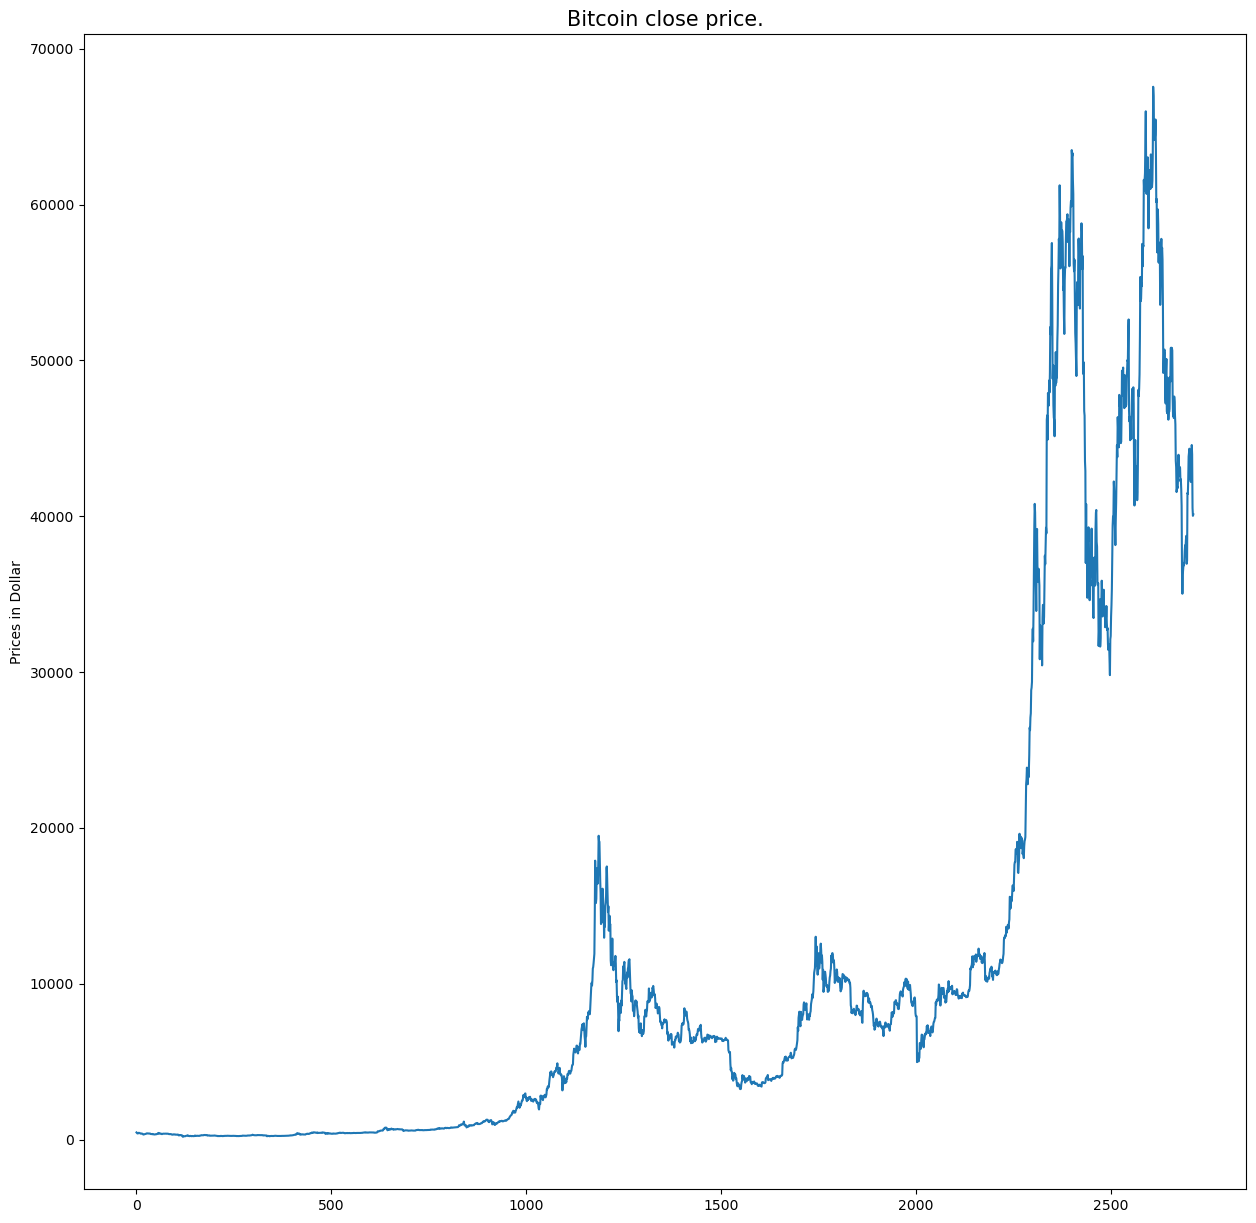

In [6]:
plt.figure(figsize=(15,15))
plt.plot(df['Close'])
plt.title("Bitcoin close price.", fontsize = 15)
plt.ylabel("Prices in Dollar")
plt.show()

we can observe an upward trend in the closing prices of the stocks 

In [7]:
df[df['Close'] == df['Adj Close']].shape ,df.shape

((2713, 7), (2713, 7))

We observe above that adj close and close have the same values. So since there is redundancy we will remove one column

In [8]:
df = df.drop(['Adj Close'],axis = 1)

In [9]:
#checking for null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

There are no null values present in the dataset

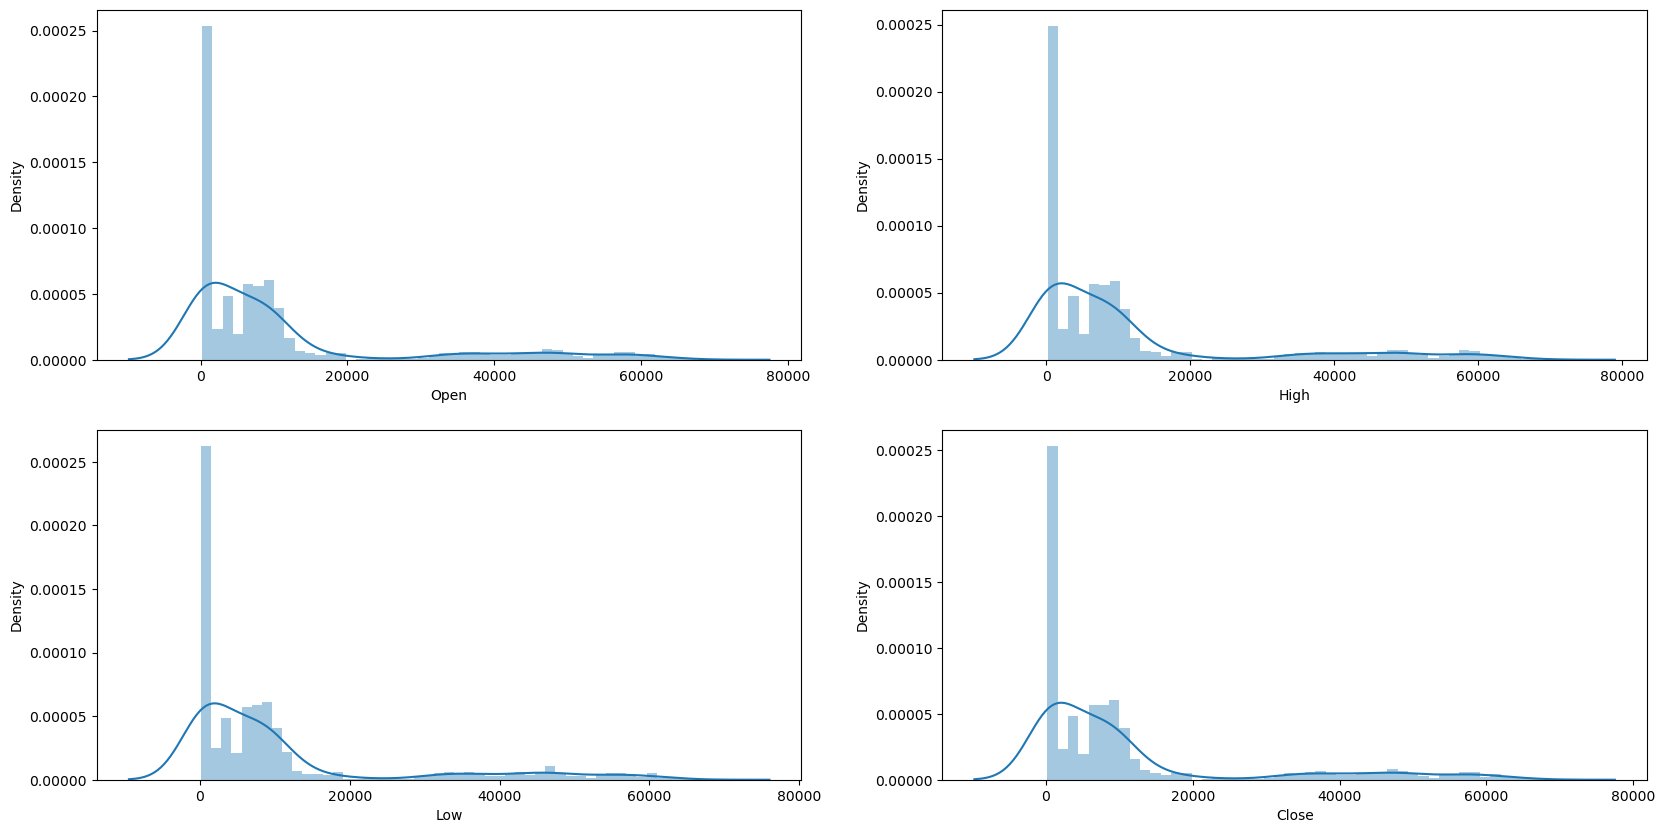

In [10]:
#creating subplots
features = ['Open','High','Low','Close']
plt.subplots(figsize=(20,10))
for i ,col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.distplot(df[col])
plt.show()

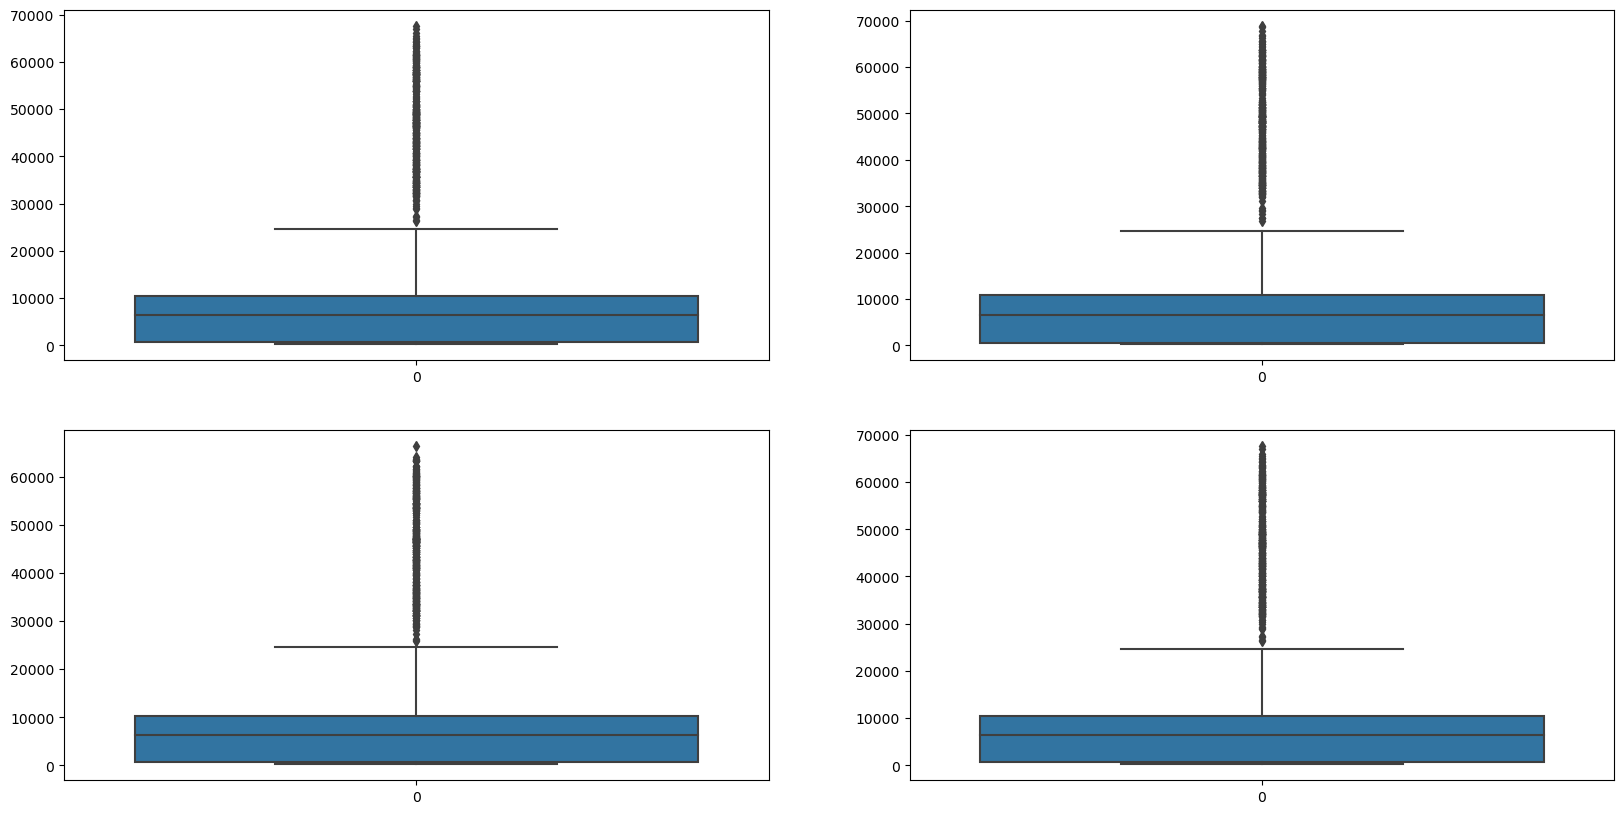

In [11]:
#creating boxplots
plt.subplots(figsize = (20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
plt.show()

We can observe a lot of outliers present in the data; which implies that there have been huge deflection in the value over a short preiod of time

# FEATURE ENGINEERING

Derives valuable features from the existing ones. These extra features helps in increasing the performance of the model significantly

In [12]:
splitted = df['Date'].str.split('-',expand = True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')
#convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


Now we have three columns day,month and year; all three have been derived from date column

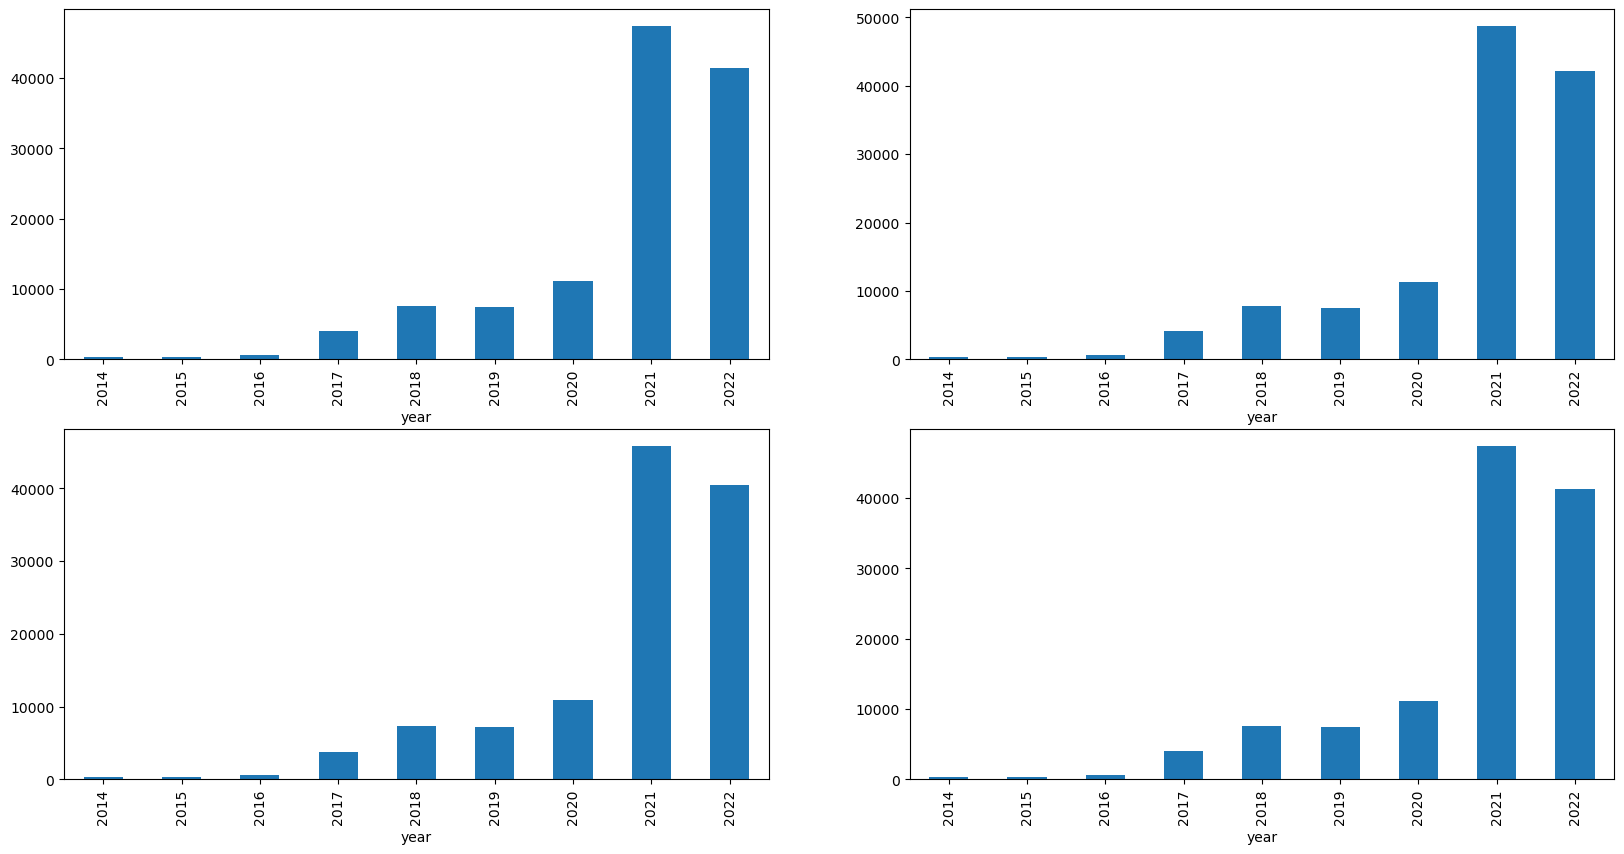

In [14]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize = (20,10))
for i, col in enumerate(['Open','High','Low','Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [15]:
df['is_quarter_end'] = np.where(df['month']%3 == 0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [16]:
df['Open-Close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

We have created target column to predict whether to buy or not. We will train our model to predict the same

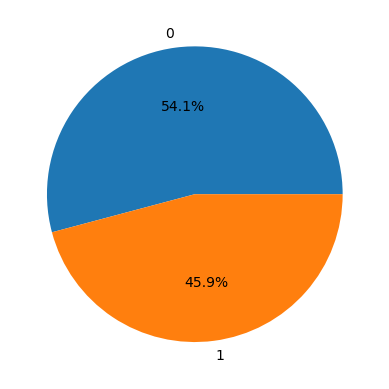

In [17]:
plt.pie(df['target'].value_counts().values,labels = [0,1],autopct = '%1.1f%%')
plt.show()

When we add features to the dataset we need to make sure that the features arent correlated; as they do not help in learning the model

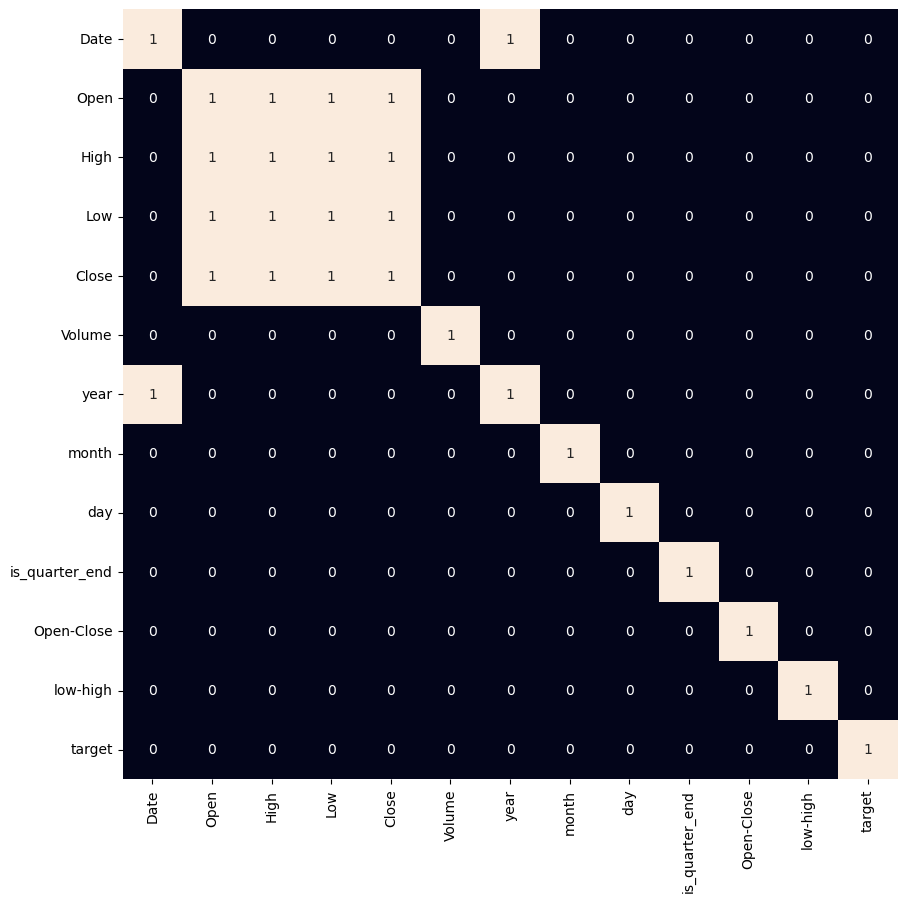

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.9,annot = True,cbar = False)
plt.show()

From the above heatmap we can observe that there is a high correlation between Open,High,Low,Close columns. Also we see that there are several columns that we engineered arent correlated hence we are good to go 

In [19]:
features = df[['Open-Close','low-high','is_quarter_end']]
target = df['target']
#scaling the vars
scaler = StandardScaler()
features = scaler.fit_transform(features)
#splitting the dataset
X_train,X_valid,Y_train,Y_valid = X_train, X_valid, Y_train, Y_valid = features[:len(features)//7],features[len(features)//7:],target[:len(features)//7],target[len(features)//7:]


## Model Development and Evaluation
Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [20]:
models = [LogisticRegression(),SVC(kernel = 'poly',probability = True ),XGBClassifier()]
for i in range(3):
    models[i].fit(X_train,Y_train)
    
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5350328683662017
Validation Accuracy :  0.5171419395315489

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4620811287477955
Validation Accuracy :  0.4875377180927342

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

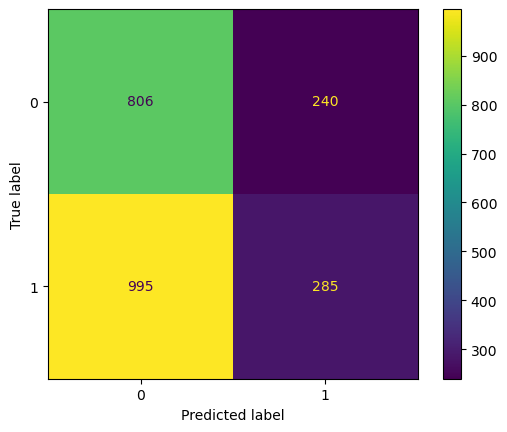

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(models[0],X_valid,Y_valid)
plt.show()